## Observations and Insights 

In [1]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head())
print(study_results.head())
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how = 'inner')
# Display the data table for preview

combined_df.head(20)



  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].value_counts()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Size of orginal DF= 1892, Size of new DF 1888

#duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

duplicated_mice = combined_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicated_mice 



0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_study_df.reset_index(inplace=True)
print(len(mouse_study_df))


mouse_study_df.head(15)


1888


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
5,5,k403,Ramicane,Male,21,16,25,33.464577,1
6,6,k403,Ramicane,Male,21,16,30,31.099498,1
7,7,k403,Ramicane,Male,21,16,35,26.546993,1
8,8,k403,Ramicane,Male,21,16,40,24.365505,1
9,9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_study_df)
num_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
regimens = mouse_study_df['Drug Regimen'].unique()
print(regimens)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = mouse_study_df.groupby(["Drug Regimen"])

drug_mean = drug_regimen['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen['Tumor Volume (mm3)'].median()
drug_var = drug_regimen['Tumor Volume (mm3)'].var()
drug_std = drug_regimen['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen['Tumor Volume (mm3)'].sem()

data = {
    'Mean': drug_mean,
    'Median':drug_median,
    'Variance' : drug_var,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
}

summary_df = pd.DataFrame(data)
summary_df

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = drug_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
summary_aggregate



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

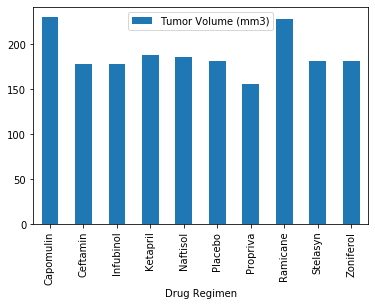

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_drug_test =drug_regimen['Tumor Volume (mm3)'].count()
data_bar:{
    'Drug Regimen': regimens,
    'Number of Measurments': num_drug_test
}
bar_pd_df = pd.DataFrame(num_drug_test)
bar_pd_df.plot.bar()
#print(drug_regimen)
#pd.DataFrame(drug_regimen.count())
#ax =  mouse_study_df.plot.bar(x='Drug Regimen',y = 'Tumor Volume (mm3)', rot=90)

Text(0, 0.5, 'Number of Measurments')

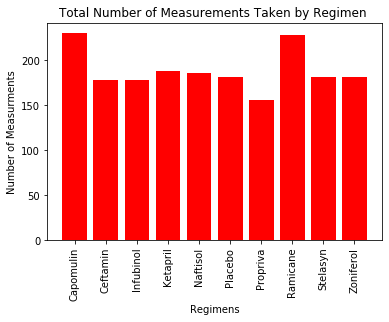

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#The tick are wrong
num_regimen = drug_regimen['Mouse ID'].count()

plt.bar(bar_pd_df.index, num_regimen ,color ='r')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Total Number of Measurements Taken by Regimen ')
plt.xlabel('Regimens')
plt.ylabel('Number of Measurments')




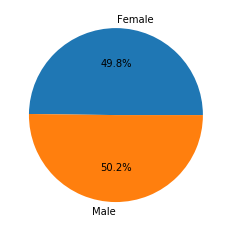

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = mouse_study_df.loc[:,['Mouse ID','Sex']] #1888

#DataFrame with Uniques ID and Sex Column
unique_sex_id = sex_df.drop_duplicates(subset='Mouse ID')

#DataFrame Number ofsex
num_sex = unique_sex_id.groupby('Sex').count()
labels = num_sex.index


plot_pandas = plt.pie(num_sex['Mouse ID'],labels = labels,autopct="%1.1f%%")


[124 125]


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


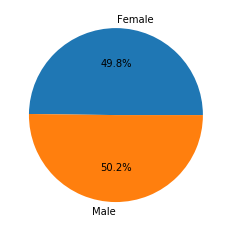

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
array_sex = np.array(num_sex['Mouse ID'])

plot_py = plt.pie(array_sex,labels = labels,autopct="%1.1f%%")

print(array_sex)
mouse_study_df.head()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#original DataFrame mouse_study_df len = 1888

# Start by getting the last (greatest) timepoint for each mouse

unique_id = mouse_study_df['Mouse ID'].unique() #len = 249

mouse_timepoint = mouse_study_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
mouseID_timepoint = mouse_timepoint.groupby('Mouse ID')
max_timepoint = mouseID_timepoint.max()
max_timepoint

#verify = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'z314', :]
#print(len(verify))
#verify.head(20)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




,Drug Regimen,Timepoint
Mouse ID,,
a203,Infubinol,45
a251,Infubinol,45
a262,Placebo,45
a275,Ceftamin,45
a366,Stelasyn,30
...,...,...
z435,Propriva,10
z578,Ramicane,45
z581,Infubinol,45


In [14]:


# Put treatments into a list for for loop (and later for plot labels)
treatments = max_timepoint['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
